In [ ]:
# Install yfinance if not already installed
!pip install yfinance plotly

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# Step 1: Download Apple stock data (2022-2025)
data = yf.download("AAPL", start="2022-01-01", end="2025-01-01")


C:\Users\pravi\AppData\Local\Temp\ipykernel_25360\2087114990.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2022-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


In [5]:
# Step 2: Save dataset as CSV
data.to_csv("C://Users//pravi//Downloads//archive (7)//HistoricalQuotes.csv")
print("✅ Dataset saved as apple_stock_data.csv")


✅ Dataset saved as apple_stock_data.csv


In [6]:
# Step 3: Show first few rows
print(data.head())


Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.443115  179.296076  174.227395  174.345039  104487900
2022-01-04  176.178375  179.354886  175.609740  179.050963   99310400
2022-01-05  171.492065  176.639180  171.217554  176.090157   94537600
2022-01-06  168.629288  171.864620  168.276342  169.315567   96904000
2022-01-07  168.795959  170.727354  167.678301  169.501851   86709100


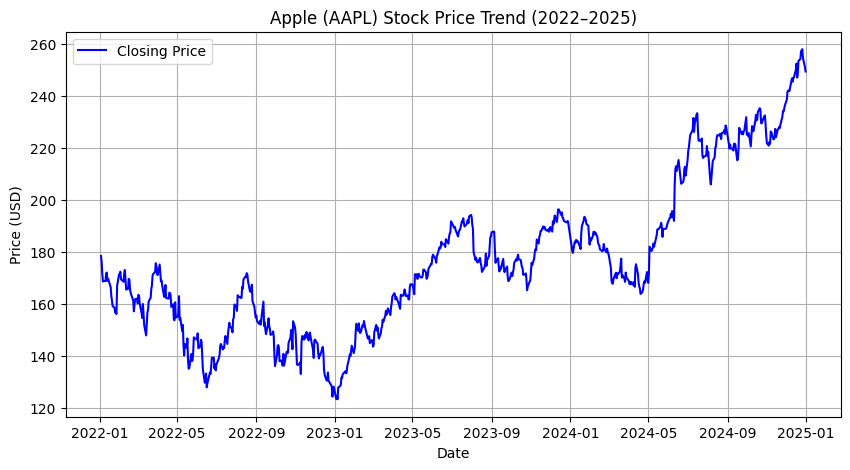

In [7]:
# Step 4: Plot Closing Price Trend
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.title("Apple (AAPL) Stock Price Trend (2022–2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Step 5: Moving Averages (20-day and 50-day)
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()


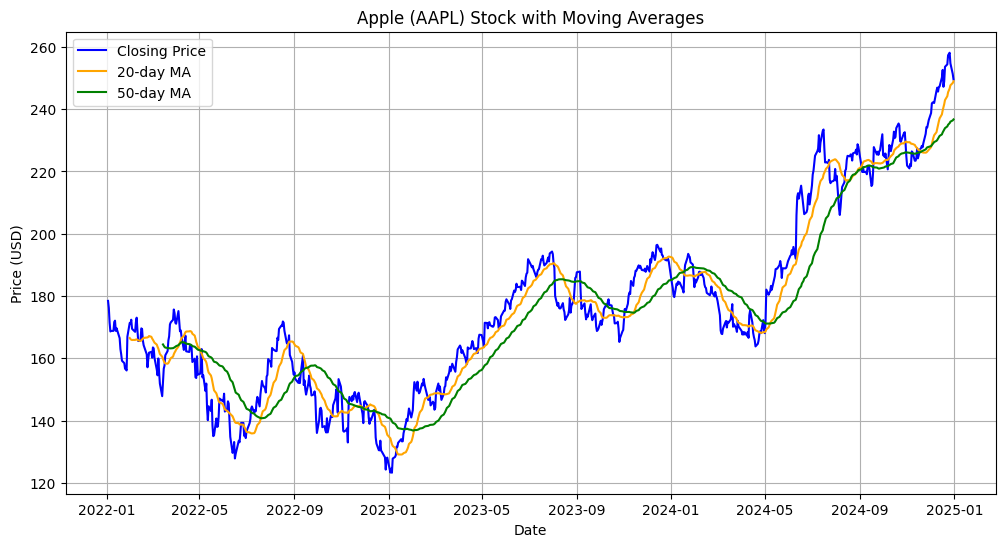

In [9]:

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['MA20'], label='20-day MA', color='orange')
plt.plot(data['MA50'], label='50-day MA', color='green')
plt.title("Apple (AAPL) Stock with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Flatten column names (remove multi-level indexing)
data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]


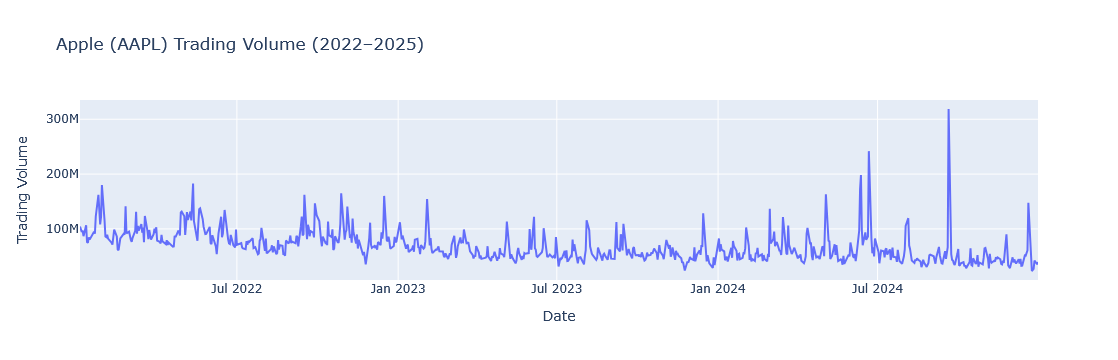

In [12]:
# Step 6: Interactive Volume Chart with Plotly
import plotly.express as px

# Flatten columns in case of multi-level
data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]

fig = px.line(data, x=data.index, y="Volume",
              title="Apple (AAPL) Trading Volume (2022–2025)",
              labels={'Volume': 'Trading Volume'})
fig.show()


C:\Users\pravi\AppData\Local\Temp\ipykernel_25360\3945996227.py:14: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


✅ Dataset saved as apple_stock_data.csv


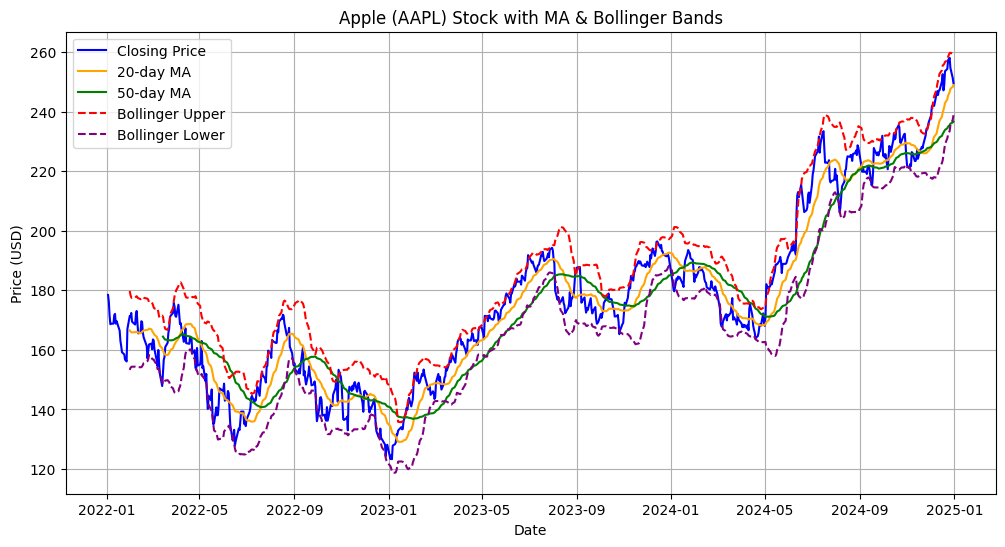

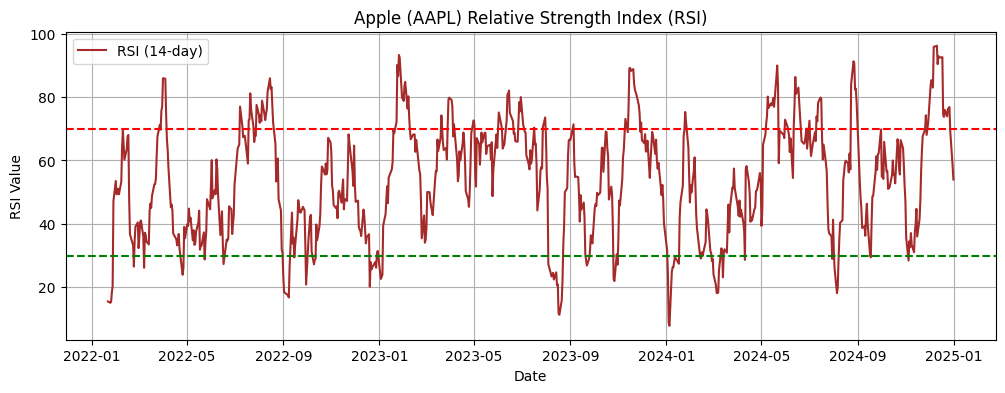

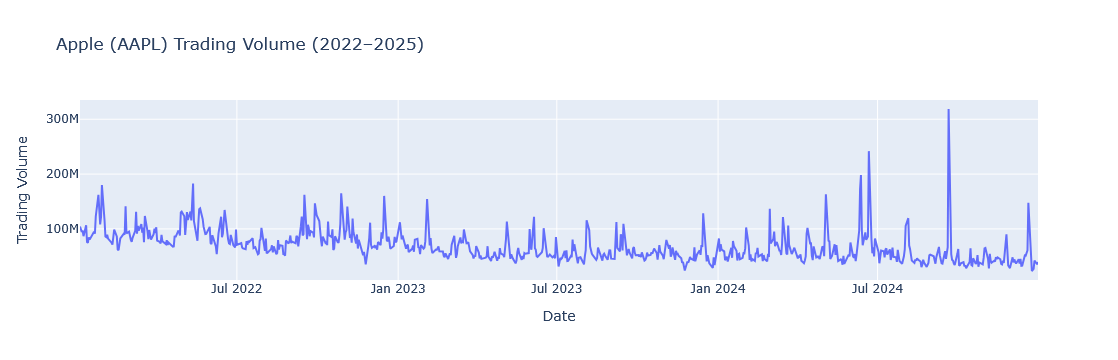

In [13]:
# ---------------------------------------------
# 📌 Task 5: Stock Market Data Analysis
# Stock: Apple (AAPL)
# Tools: Python, yfinance, Matplotlib, Plotly
# Includes: Bollinger Bands & RSI
# ---------------------------------------------

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Step 1: Download Apple stock data (2022-2025)
data = yf.download("AAPL", start="2022-01-01", end="2025-01-01")

# Flatten multi-index columns if any
data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]

# Step 2: Save dataset as CSV
data.to_csv("C://Users//pravi//Downloads//archive (7)//HistoricalQuotes.csv")
print("✅ Dataset saved as apple_stock_data.csv")

# Step 3: Calculate Moving Averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Step 4: Calculate Bollinger Bands (20-day)
data['BB_up'] = data['MA20'] + 2*data['Close'].rolling(window=20).std()
data['BB_dn'] = data['MA20'] - 2*data['Close'].rolling(window=20).std()

# Step 5: Calculate RSI (Relative Strength Index - 14 day)
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# ---------------- VISUALIZATIONS ---------------- #

# Closing Price with Moving Averages & Bollinger Bands
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['MA20'], label='20-day MA', color='orange')
plt.plot(data['MA50'], label='50-day MA', color='green')
plt.plot(data['BB_up'], label='Bollinger Upper', color='red', linestyle='--')
plt.plot(data['BB_dn'], label='Bollinger Lower', color='purple', linestyle='--')
plt.title("Apple (AAPL) Stock with MA & Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# RSI Plot
plt.figure(figsize=(12,4))
plt.plot(data['RSI'], label='RSI (14-day)', color='brown')
plt.axhline(70, linestyle='--', color='red')   # Overbought
plt.axhline(30, linestyle='--', color='green') # Oversold
plt.title("Apple (AAPL) Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.show()

# Interactive Trading Volume Chart with Plotly
fig = px.line(data, x=data.index, y="Volume",
              title="Apple (AAPL) Trading Volume (2022–2025)",
              labels={'Volume': 'Trading Volume'})
fig.show()
